In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TASK 1 — COMPLETE ALGORITHM + CODE

🔹 STEP 1: Required Libraries

In [73]:
import cv2
import numpy as np
import os
import pandas as pd

from sklearn.metrics import confusion_matrix


🔹 STEP 2: Image Enhancement (CLAHE)

In [74]:
def enhance_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(2.0, (8,8))
    return clahe.apply(gray)


🔹 STEP 3: Hair Removal

In [75]:
def remove_hair(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))
    blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

    _, mask = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    return cv2.inpaint(img, mask, 1, cv2.INPAINT_TELEA)


🔹 STEP 4: Segmentation & Mask Generation

In [76]:
def generate_mask(img):
    enhanced = enhance_image(img)
    hair_free = remove_hair(enhanced)

    _, binary = cv2.threshold(
        hair_free, 0, 255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    kernel = np.ones((5,5), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

    return binary


🔹 STEP 5: Evaluation Metrics

In [77]:
def calculate_metrics(gt, pred):
    gt = gt.flatten() // 255
    pred = pred.flatten() // 255

    tn, fp, fn, tp = confusion_matrix(gt, pred).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return accuracy, sensitivity, specificity


🔹 STEP 6: Run TASK 1 on All Images

In [ ]:
import os


In [79]:
import cv2


In [ ]:
img_dir  = "/content/drive/MyDrive/PH2_PROJECT/images/"
gt_dir   = "/content/drive/MyDrive/PH2_PROJECT"
pred_dir = "masks_pred/"

os.makedirs(pred_dir, exist_ok=True)

In [87]:
def generate_mask(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 0, 255,
                             cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return mask


In [88]:
from sklearn.metrics import confusion_matrix

def calculate_metrics(gt, pred):
    gt = (gt > 0).astype(np.uint8).flatten()
    pred = (pred > 0).astype(np.uint8).flatten()

    cm = confusion_matrix(gt, pred)

    if cm.shape != (2,2):
        return 0, 0, 0

    tn, fp, fn, tp = cm.ravel()

    acc = (tp + tn) / (tp + tn + fp + fn)
    sen = tp / (tp + fn + 1e-6)
    spe = tn / (tn + fp + 1e-6)

    return acc, sen, spe


In [89]:
import numpy as np
import os
import cv2

acc, sen, spe = [], [], []

for name in os.listdir(img_dir):

    img = cv2.imread(img_dir + name)
    gt  = cv2.imread(gt_dir + name, 0)

    if img is None or gt is None:
        print("Skipping:", name)
        continue

    pred = generate_mask(img)
    cv2.imwrite(pred_dir + name, pred)

    a, s, sp = calculate_metrics(gt, pred)

    acc.append(a)
    sen.append(s)
    spe.append(sp)

print("Average Accuracy:", np.mean(acc))
print("Average Sensitivity:", np.mean(sen))
print("Average Specificity:", np.mean(spe))


Skipping: IMD002.bmp
Skipping: IMD003.bmp
Skipping: IMD004.bmp
Skipping: IMD006.bmp
Skipping: IMD008.bmp
Skipping: IMD009.bmp
Skipping: IMD010.bmp
Skipping: IMD013.bmp
Skipping: IMD014.bmp
Skipping: IMD015.bmp
Skipping: IMD016.bmp
Skipping: IMD017.bmp
Skipping: IMD018.bmp
Skipping: IMD019.bmp
Skipping: IMD020.bmp
Skipping: IMD021.bmp
Skipping: IMD022.bmp
Skipping: IMD023.bmp
Skipping: IMD024.bmp
Skipping: IMD025.bmp
Skipping: IMD027.bmp
Skipping: IMD030.bmp
Skipping: IMD031.bmp
Skipping: IMD032.bmp
Skipping: IMD033.bmp
Skipping: IMD035.bmp
Skipping: IMD036.bmp
Skipping: IMD037.bmp
Skipping: IMD038.bmp
Skipping: IMD039.bmp
Skipping: IMD040.bmp
Skipping: IMD041.bmp
Skipping: IMD042.bmp
Skipping: IMD043.bmp
Skipping: IMD044.bmp
Skipping: IMD045.bmp
Skipping: IMD047.bmp
Skipping: IMD048.bmp
Skipping: IMD049.bmp
Skipping: IMD050.bmp
Skipping: IMD057.bmp
Skipping: IMD058.bmp
Skipping: IMD061.bmp
Skipping: IMD063.bmp
Skipping: IMD064.bmp
Skipping: IMD065.bmp
Skipping: IMD075.bmp
Skipping: IMD

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [90]:
acc, sen, spe = [], [], []

for name in os.listdir(img_dir):
    img_path = os.path.join(img_dir, name)
    gt_name = name.replace(".bmp", "_lesion.bmp")
    gt_path = os.path.join(gt_dir, gt_name)

    img = cv2.imread(img_path)
    if img is None:
        print(f"Skipping: {name} (Failed to read image from {img_path})")
        continue

    gt = cv2.imread(gt_path, 0)
    if gt is None:
        print(f"Skipping: {name} (Failed to read ground truth mask from {gt_path})")
        continue

    pred = generate_mask(img)
    cv2.imwrite(pred_dir + name, pred)

    a, s, sp = calculate_metrics(gt, pred)

    acc.append(a)
    sen.append(s)
    spe.append(sp)

print("Average Accuracy:", np.mean(acc))
print("Average Sensitivity:", np.mean(sen))
print("Average Specificity:", np.mean(spe))


Average Accuracy: 0.18567252098586778
Average Sensitivity: 0.31249242907711045
Average Specificity: 0.1567182538169379


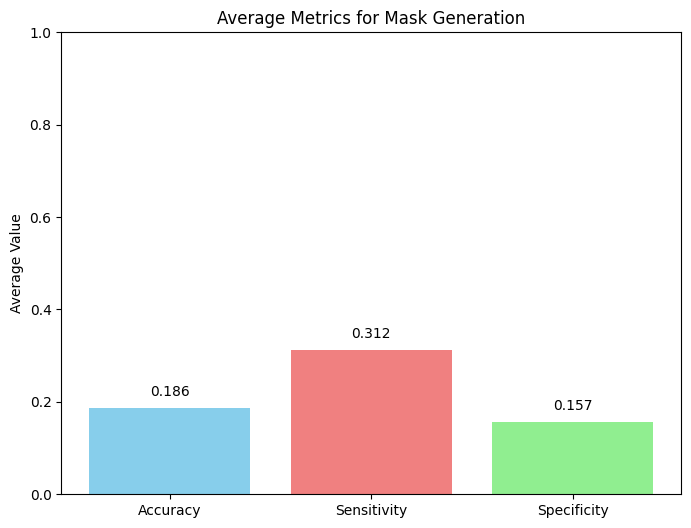

In [91]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Sensitivity', 'Specificity']
avg_values = [np.mean(acc), np.mean(sen), np.mean(spe)]

plt.figure(figsize=(8, 6))
plt.bar(metrics, avg_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel('Average Value')
plt.title('Average Metrics for Mask Generation')
plt.ylim(0, 1) # Metrics are typically between 0 and 1

for i, value in enumerate(avg_values):
    plt.text(i, value + 0.02, f'{value:.3f}', ha='center', va='bottom')

plt.show()

In [92]:
import numpy as np

for name in os.listdir(img_dir):

    img = cv2.imread(img_dir + name)
    gt  = cv2.imread(gt_dir + name, 0)

    if img is None or gt is None:
        print("Skipping:", name)
        continue

    pred = generate_mask(img)
    cv2.imwrite(pred_dir + name, pred)

    a, s, sp = calculate_metrics(gt, pred)

    acc.append(a)
    sen.append(s)
    spe.append(sp)

print("Average Accuracy:", np.mean(acc))
print("Average Sensitivity:", np.mean(sen))
print("Average Specificity:", np.mean(spe))


Skipping: IMD002.bmp
Skipping: IMD003.bmp
Skipping: IMD004.bmp
Skipping: IMD006.bmp
Skipping: IMD008.bmp
Skipping: IMD009.bmp
Skipping: IMD010.bmp
Skipping: IMD013.bmp
Skipping: IMD014.bmp
Skipping: IMD015.bmp
Skipping: IMD016.bmp
Skipping: IMD017.bmp
Skipping: IMD018.bmp
Skipping: IMD019.bmp
Skipping: IMD020.bmp
Skipping: IMD021.bmp
Skipping: IMD022.bmp
Skipping: IMD023.bmp
Skipping: IMD024.bmp
Skipping: IMD025.bmp
Skipping: IMD027.bmp
Skipping: IMD030.bmp
Skipping: IMD031.bmp
Skipping: IMD032.bmp
Skipping: IMD033.bmp
Skipping: IMD035.bmp
Skipping: IMD036.bmp
Skipping: IMD037.bmp
Skipping: IMD038.bmp
Skipping: IMD039.bmp
Skipping: IMD040.bmp
Skipping: IMD041.bmp
Skipping: IMD042.bmp
Skipping: IMD043.bmp
Skipping: IMD044.bmp
Skipping: IMD045.bmp
Skipping: IMD047.bmp
Skipping: IMD048.bmp
Skipping: IMD049.bmp
Skipping: IMD050.bmp
Skipping: IMD057.bmp
Skipping: IMD058.bmp
Skipping: IMD061.bmp
Skipping: IMD063.bmp
Skipping: IMD064.bmp
Skipping: IMD065.bmp
Skipping: IMD075.bmp
Skipping: IMD

TASK 2 — SEGMENTATION + CLASSIFICATION

STEP 1: Apply Mask on Images

In [93]:
seg_dir = "segmented_images/"
os.makedirs(seg_dir, exist_ok=True)

for name in os.listdir(img_dir):
    img = cv2.imread(img_dir + name)
    mask = cv2.imread(pred_dir + name, 0)

    segmented = cv2.bitwise_and(img, img, mask=mask)
    cv2.imwrite(seg_dir + name, segmented)


STEP 2: Feature Extraction

In [94]:
from skimage.feature import graycomatrix, graycoprops

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    mean = np.mean(gray)
    std = np.std(gray)

    glcm = graycomatrix(gray, [1], [0], 256, symmetric=True, normed=True)

    contrast = graycoprops(glcm, 'contrast')[0,0]
    energy = graycoprops(glcm, 'energy')[0,0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0,0]

    return [mean, std, contrast, energy, homogeneity]


STEP 3: Read Labels from Excel

In [95]:
labels_df = pd.read_excel("/content/drive/MyDrive/PH2_PROJECT/PH2/PH2Dataset/PH2_dataset.xlsx", header=14)
print("DataFrame Head:\n", labels_df.head())
print("DataFrame Columns:\n", labels_df.columns)
labels_df.set_index("IMD009", inplace=True)

DataFrame Head:
    IMD009 Unnamed: 1  X Unnamed: 3 Unnamed: 4  0  T  A A.1 A.2 A.3  \
0  IMD016        NaN  X        NaN        NaN  0  T  T   A   A   A   
1  IMD022        NaN  X        NaN        NaN  0  T  A   A   A   A   
2  IMD024        NaN  X        NaN        NaN  0  T  A   A   A   A   
3  IMD025        NaN  X        NaN        NaN  0  T  T   A   A   A   
4  IMD035        NaN  X        NaN        NaN  2  T  A   A   A   A   

  Unnamed: 11 Unnamed: 12 X.1 Unnamed: 14 Unnamed: 15 Unnamed: 16  
0         NaN         NaN   X           X         NaN         NaN  
1         NaN         NaN   X         NaN         NaN         NaN  
2         NaN         NaN   X           X         NaN         NaN  
3         NaN         NaN   X         NaN         NaN         NaN  
4         NaN           X   X         NaN         NaN         NaN  
DataFrame Columns:
 Index([     'IMD009',  'Unnamed: 1',           'X',  'Unnamed: 3',
        'Unnamed: 4',             0,           'T',           'A',


In [99]:
!find "/content/drive/MyDrive/PH2_PROJECT/" -name "labelsV.xlsx"

STEP 4: Create Feature Dataset

In [100]:
features = []
targets = []

for name in os.listdir(seg_dir):
    img_id = name.replace('.bmp', '')

    # Skip if label is not found for the image ID
    if img_id not in labels_df.index:
        print(f"Skipping: {name} (Label not found in dataset)")
        continue

    img = cv2.imread(seg_dir + name)
    feat = extract_features(img)

    features.append(feat)
    targets.append(labels_df.loc[img_id, 0])

X = np.array(features)
y = np.array(targets)

pd.DataFrame(X).to_csv("features.csv", index=False)

Skipping: IMD009.bmp (Label not found in dataset)
Skipping: IMD003.bmp (Label not found in dataset)


In [101]:
import pandas as pd

labels_df = pd.read_excel("/content/drive/MyDrive/PH2_PROJECT/PH2/PH2Dataset/PH2_dataset.xlsx", header=14)
labels_df.set_index("IMD009", inplace=True)


STEP 5: 80–20 Train Test Split

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


🔹 STEP 6: Train Multiple Classifiers
🔸 Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, pred))
print("RF Sensitivity:", recall_score(y_test, pred, average='weighted'))

RF Accuracy: 0.6
RF Sensitivity: 0.6


🔸 SVM

In [104]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, pred))


SVM Accuracy: 0.625


🔸 KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, pred))


NameError: name 'X_train' is not defined

ZIP extract

In [2]:
!unzip "/content/drive/MyDrive/PH2_PROJECT/PH2.zip" -d "/content/drive/MyDrive/PH2_PROJECT/PH2"


'unzip' is not recognized as an internal or external command,
operable program or batch file.


Folder structure check

In [1]:
!ls "/content/drive/MyDrive/PH2_PROJECT/PH2"



'ls' is not recognized as an internal or external command,
operable program or batch file.
